### Logistic Regression 

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [18]:
# Evaluation function that prints classification report and confusion matrix
def evaluate(y_test, y_pred, model_name):
    # Creating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Priting the model name
    print(f"\033[34m{model_name}\033[0m")

    # Print the classification report
    print(f" \033[32mClassification Report:\033[0m")
    print(classification_report(y_test, y_pred))
    print(f" \033[32mConfusion Matrix:\033[0m")
    
    # Print the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'{model_name}: Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [3]:
#importing datasets
train_df = pd.read_csv("customer_churn_dataset-training-master.csv")
test_df = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [4]:
# Inspecting the data 
train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
test_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [6]:
#figure out how many different values are in the columns with string datatype

unique_gender = train_df["Gender"].unique()

print("Unique values in Gender column:", unique_gender)

unique_subtype = train_df["Subscription Type"].unique()

print("Unique values in Subscription Type column:", unique_subtype)

unique_contractLenght = train_df["Contract Length"].unique()

print("Unique values in Contract Length column:", unique_contractLenght)

Unique values in Gender column: ['Female' 'Male' nan]
Unique values in Subscription Type column: ['Standard' 'Basic' 'Premium' nan]
Unique values in Contract Length column: ['Annual' 'Monthly' 'Quarterly' nan]


In [7]:
# Seeing how many missing values there are
print(train_df.isna().sum())
print(test_df.isna().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [8]:
# Since there are only one missing value, it is feasible to drop this 
train_df.dropna(inplace=True)

In [9]:
# Defining the categorical and numerical variables
num = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
cat = ['Gender', 'Subscription Type', 'Contract Length']

In [10]:
# Creating transformers for numerical and categorical features
numeric_tf = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_tf = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encode categorical features
])

# Combinding the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_tf, num),
        ('cat', categorical_tf, cat)
    ])

In [11]:
# Apply the preprocessing to train and test data
X_train = preprocessor.fit_transform(train_df.drop(columns=['CustomerID', 'Churn']))
y_train = train_df['Churn']
X_test = preprocessor.transform(test_df.drop(columns=['CustomerID', 'Churn']))
y_test = test_df['Churn']

In [12]:
# Initialising Logistic Regression 
lr = LogisticRegression(max_iter=1000000, random_state=9)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000000, random_state=9)

LogisticRegression(max_iter=1000000, random_state=9)
 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.19      0.32     33881
           1       0.53      0.99      0.69     30493

    accuracy                           0.57     64374
   macro avg       0.74      0.59      0.50     64374
weighted avg       0.75      0.57      0.49     64374

 Confusion Matrix:


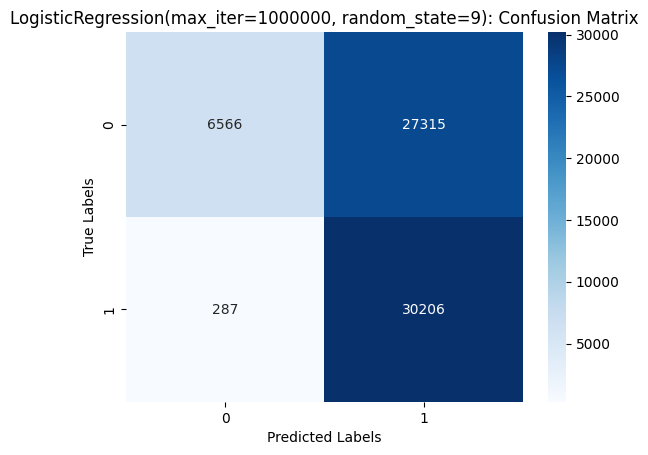

In [17]:
# Evaluating the results 
evaluate(y_test, y_pred, lr)